## <p> <span style="color:blueviolet"> <em>Standard Data Analysis imports</em></span>.</p>


In [59]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report


# Import chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

#all libraries and packages may not be necessary, but its best to overprepare. 


In [60]:
# Load data set into Pandas dataframe
df = pd.read_csv('/Users/Spence604/Library/CloudStorage/OneDrive-WesternGovernorsUniversity/Docs/Churn Data/churn_clean.csv')

# Rename last 8 survey columns for better description of variables
df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'Fixes', 
                     'Item3':'Replacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'Respectfulness', 
                     'Item7':'Courteous', 
                     'Item8':'Listening'}, 
          inplace=True)


In [61]:
#rename columns to give more information about them
df.rename(columns={'Children':'Children in Household'}, inplace=True)
df.rename(columns={'Outage_sec_perweek':'Weekly Outage in Seconds'}, inplace=True)
df.rename(columns={'Outage_sec_perweek':'Weekly Outage in Seconds'}, inplace=True)
df.rename(columns={'Bandwidth_GB_Year':'Average Annual Bandwidth in GB'}, inplace=True)
df.rename(columns={'Email':'Emails Sent to Customer'}, inplace=True)
df.rename(columns={'Tenure':'Monthly Tenure'}, inplace=True)

## <p> <span style="color:blueviolet"> <em>Understanding the data</em></span>.</p>


In [62]:
df

CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West Branch    MI   
2     f1784cfa9f6d92ae816197eb175d3c71       Yamhill    OR   
3     dc8a365077241bb5cd5ccd305136b05e       Del Mar    CA   
4     aabb64a116e83fdc4befc1fbab1663f9     Needville    TX   
...                                ...           ...   ...   
9995  9499fb4de537af195d16d046b79fd20a   Mount Holly    VT   
9996  c09a841117fa81b5c8e19afec2760104   Clarksville    TN   
9997  9c41f212d1e04dca84445019bbc9b41c      Mobeetie    TX   
9998  3e1f269b40c235a1038863ecf6b7a0df    Carrollton    GA   
9999  0ea683a03a3cd544aefe8388aab16176  Clarkesville    GA   

                     County    Zip       Lat        Lng  ...  MonthlyCharge  \
0     Prince of Wales-Hyder  99927  56.25100 -133.37571  ...     172.455519   
1                    Ogemaw  48661  44.32893  -84.24080  ...     242.632554   
2                   Yamhill  97148  45.35589 -123.24657  ...     159.947583   
3                 San Diego  92014  32.96687 -117.24798  ...     119.956840   
4                 Fort Bend  77461  29.38012  -95.80673  ...     149.948316   
...                     ...    ...       ...        ...  ...            ...   
9995                Rutland   5758  43.43391  -72.78734  ...     159.979400   
9996             Montgomery  37042  36.56907  -87.41694  ...     207.481100   
9997                Wheeler  79061  35.52039 -100.44180  ...     169.974100   
9998                Carroll  30117  33.58016  -85.13241  ...     252.624000   
9999              Habersham  30523  34.70783  -83.53648  ...     217.484000   

     Average Annual Bandwidth in GB TimelyResponse Fixes  Replacements  \
0                        904.536110              5     5             5   
1                        800.982766              3     4             3   
2                       2054.706961              4     4             2   
3                       2164.579412              4     4             4   
4                        271.493436              4     4             4   
...                             ...            ...   ...           ...   
9995                    6511.252601              3     2             3   
9996                    5695.951810              4     5             5   
9997                    4159.305799              4     4             4   
9998                    6468.456752              4     4             6   
9999                    5857.586167              2     2             3   

      Reliability  Options Respectfulness Courteous Listening  
0               3        4              4         3         4  
1               3        4              3         4         4  
2               4        4              3         3         3  
3               2        5              4         3         3  
4               3        4              4         4         5  
...           ...      ...            ...       ...       ...  
9995            3        4              3         2         3  
9996            4        4              5         2         5  
9997            4 

In [63]:
df.head()

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  MonthlyCharge  \
0  99927  56.25100 -133.37571  ...     172.455519   
1  48661  44.32893  -84.24080  ...     242.632554   
2  97148  45.35589 -123.24657  ...     159.947583   
3  92014  32.96687 -117.24798  ...     119.956840   
4  77461  29.38012  -95.80673  ...     149.948316   

  Average Annual Bandwidth in GB TimelyResponse Fixes  Replacements  \
0                     904.536110              5     5             5   
1                     800.982766              3     4             3   
2                    2054.706961              4     4             2   
3                    2164.579412              4     4             4   
4                     271.493436              4     4             4   

   Reliability  Options Respectfulness Courteous Listening  
0            3        4              4         3         4  
1            3        4              3         4         4  
2            4        4              3         3         3  
3            2        5              4         3         3  
4            3        4              4         4         5  

[5 rows x 50 columns]

In [67]:
df.columns

Index(['Children in Household', 'Age', 'Income', 'Gender',
       'Weekly Outage in Seconds', 'Emails Sent to Customer', 'Techie',
       'StreamingTV', 'StreamingMovies', 'Monthly Tenure',
       'Average Annual Bandwidth in GB'],
      dtype='object')

In [66]:
# remove variables that aren't useful for our analysis
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Marital', 'Churn',
       'Contacts', 'Yearly_equip_failure',
       'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',      'PaperlessBilling', 'PaymentMethod', 'MonthlyCharge',
       'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'])
df.describe()

KeyError: "['CaseOrder' 'Customer_id' 'Interaction' 'UID' 'City' 'State' 'County'\n 'Zip' 'Lat' 'Lng' 'Population' 'Area' 'TimeZone' 'Job' 'Marital' 'Churn'\n 'Contacts' 'Yearly_equip_failure' 'Contract' 'Port_modem' 'Tablet'\n 'InternetService' 'Phone' 'Multiple' 'OnlineSecurity' 'OnlineBackup'\n 'DeviceProtection' 'TechSupport' 'PaperlessBilling' 'PaymentMethod'\n 'MonthlyCharge' 'TimelyResponse' 'Fixes' 'Replacements' 'Reliability'\n 'Options' 'Respectfulness' 'Courteous' 'Listening'] not found in axis"

In [8]:
# Keep: Gender, Age, Income, Techie, Childer,Streaming movies, streamingtv, gb per year

### Null and dupes

In [68]:
# Discover missing data points within dataset
Nulls = df.isnull().sum()
print(Nulls)

Children in Household             0
Age                               0
Income                            0
Gender                            0
Weekly Outage in Seconds          0
Emails Sent to Customer           0
Techie                            0
StreamingTV                       0
StreamingMovies                   0
Monthly Tenure                    0
Average Annual Bandwidth in GB    0
dtype: int64


In [10]:
#No nulls present

In [69]:
df.columns

Index(['Children in Household', 'Age', 'Income', 'Gender',
       'Weekly Outage in Seconds', 'Emails Sent to Customer', 'Techie',
       'StreamingTV', 'StreamingMovies', 'Monthly Tenure',
       'Average Annual Bandwidth in GB'],
      dtype='object')

In [70]:
df['Gender_num'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['Techie_num'] = [1 if v == 'Yes' else 0 for v in df['Techie']]
df['MovieStream_num'] = [1 if v == 'Yes' else 0 for v in df['StreamingMovies']]
df['TVStream_num'] = [1 if v == 'Yes' else 0 for v in df['StreamingTV']]

In [71]:
df.describe()


Children in Household           Age         Income  \
count             10000.0000  10000.000000   10000.000000   
mean                  2.0877     53.078400   39806.926771   
std                   2.1472     20.698882   28199.916702   
min                   0.0000     18.000000     348.670000   
25%                   0.0000     35.000000   19224.717500   
50%                   1.0000     53.000000   33170.605000   
75%                   3.0000     71.000000   53246.170000   
max                  10.0000     89.000000  258900.700000   

       Weekly Outage in Seconds  Emails Sent to Customer  Monthly Tenure  \
count              10000.000000             10000.000000    10000.000000   
mean                  10.001848                12.016000       34.526188   
std                    2.976019                 3.025898       26.443063   
min                    0.099747                 1.000000        1.000259   
25%                    8.018214                10.000000        7.917694   
50%                   10.018560                12.000000       35.430507   
75%                   11.969485                14.000000       61.479795   
max                   21.207230                23.000000       71.999280   

       Average Annual Bandwidth in GB    Gender_num    Techie_num  \
count                    10000.000000  10000.000000  10000.000000   
mean                      3392.341550      0.502500      0.167900   
std                       2185.294852      0.500019      0.373796   
min                        155.506715      0.000000      0.000000   
25%                       1236.470827      0.000000      0.000000   
50%                       3279.536903      1.000000      0.000000   
75%                       5586.141370      1.000000      0.000000   
max                       7158.981530      1.000000      1.000000   

       MovieStream_num  TVStream_num  
count     10000.000000  10000.000000  
mean          0.489000      0.492900  
std           0.499904      0.499975  
min           0.000000      0.000000  
25%           0.000000      0.000000  
50%           0.000000      0.000000  
75%           1.000000      1.000000  
max           1.000000      1.000000

In [72]:
df.columns

Index(['Children in Household', 'Age', 'Income', 'Gender',
       'Weekly Outage in Seconds', 'Emails Sent to Customer', 'Techie',
       'StreamingTV', 'StreamingMovies', 'Monthly Tenure',
       'Average Annual Bandwidth in GB', 'Gender_num', 'Techie_num',
       'MovieStream_num', 'TVStream_num'],
      dtype='object')

In [50]:
df.head()

Children  Age    Income  Outage_sec_perweek  Email     Tenure  \
0         0   68  28561.99            7.978323     10   6.795513   
1         1   27  21704.77           11.699080     12   1.156681   
2         4   50   9609.57           10.752800      9  15.754144   
3         1   48  18925.23           14.913540     15  17.087227   
4         0   83  40074.19            8.147417     16   1.670972   

   Bandwidth_GB_Year  Gender_num  Techie_num  MovieStream_num  TVStream_num  
0         904.536110           0           0                1             0  
1         800.982766           1           1                1             1  
2        2054.706961           1           1                1             0  
3        2164.579412           0           1                0             1  
4         271.493436           0           0                0             1

In [81]:
df = df.drop(columns=['Techie', 'Gender', 'Techie',                                 
                                                                  'StreamingTV', 'StreamingMovies'])


In [82]:
df.columns

Index(['Children in Household', 'Age', 'Income', 'Weekly Outage in Seconds',
       'Emails Sent to Customer', 'Monthly Tenure',
       'Average Annual Bandwidth in GB', 'Gender_num', 'Techie_num',
       'MovieStream_num', 'TVStream_num'],
      dtype='object')

## C4 visuals

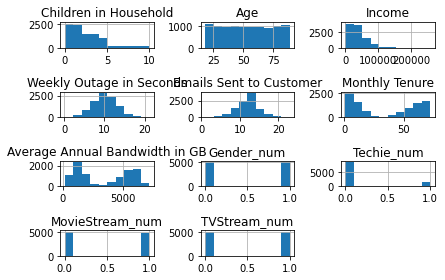

In [74]:
# Create histograms of contiuous variables
df[['Children in Household', 'Age', 'Income', 'Gender',
       'Weekly Outage in Seconds', 'Emails Sent to Customer', 'Techie',
       'StreamingTV', 'StreamingMovies', 'Monthly Tenure',
       'Average Annual Bandwidth in GB', 'Gender_num', 'Techie_num',
       'MovieStream_num', 'TVStream_num']].hist()
plt.savefig('PyPlot.jpg')
plt.tight_layout()


In [77]:
df.columns

Index(['Children in Household', 'Age', 'Income', 'Gender',
       'Weekly Outage in Seconds', 'Emails Sent to Customer', 'Techie',
       'StreamingTV', 'StreamingMovies', 'Monthly Tenure',
       'Average Annual Bandwidth in GB', 'Gender_num', 'Techie_num',
       'MovieStream_num', 'TVStream_num'],
      dtype='object')

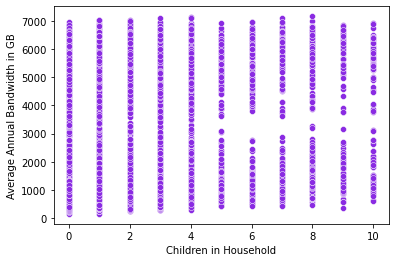

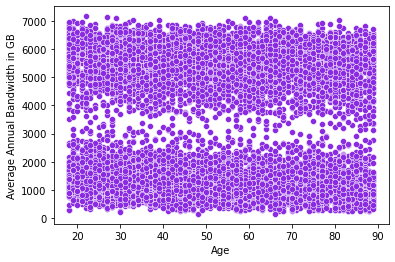

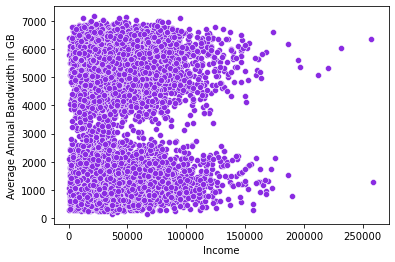

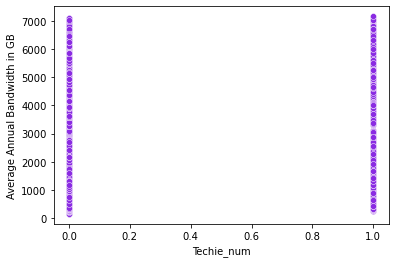

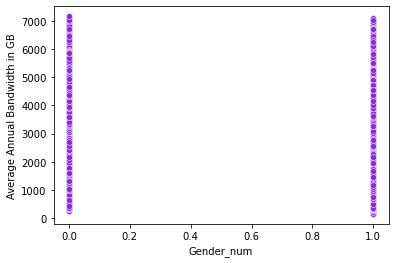

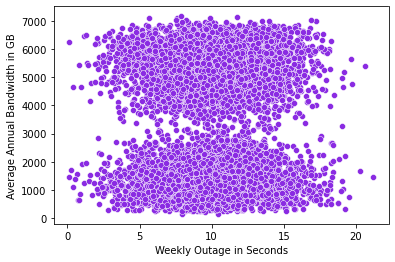

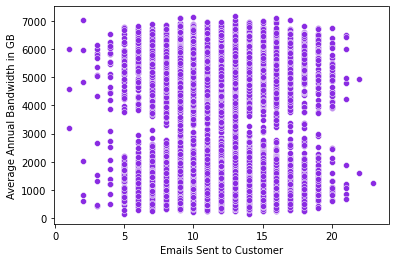

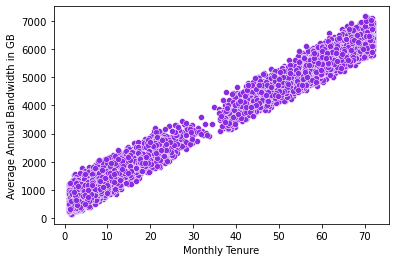

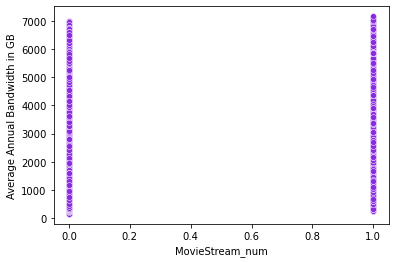

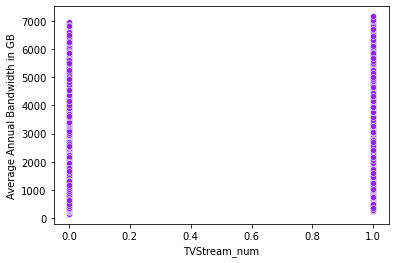

In [79]:
sns.scatterplot(x=df['Children in Household'], y=df['Average Annual Bandwidth in GB'], color='blueviolet')
plt.savefig('1234')
plt.show();

sns.scatterplot(x=df['Age'], y=df['Average Annual Bandwidth in GB'], color='blueviolet')
plt.savefig('1234f')
plt.show();

sns.scatterplot(x=df['Income'], y=df['Average Annual Bandwidth in GB'], color='blueviolet')
plt.savefig('123s4')
plt.show();


sns.scatterplot(x=df['Techie_num'], y=df['Average Annual Bandwidth in GB'], color='blueviolet')
plt.savefig('1a234')
plt.show();


sns.scatterplot(x=df['Gender_num'], y=df['Average Annual Bandwidth in GB'], color='blueviolet')
plt.savefig('1g2he34')
plt.show();

sns.scatterplot(x=df['Weekly Outage in Seconds'], y=df['Average Annual Bandwidth in GB'], color='blueviolet')
plt.savefig('1g2eh34')
plt.show();

sns.scatterplot(x=df['Emails Sent to Customer'], y=df['Average Annual Bandwidth in GB'], color='blueviolet')
plt.savefig('1g2e34')
plt.show();

sns.scatterplot(x=df['Monthly Tenure'], y=df['Average Annual Bandwidth in GB'], color='blueviolet')
plt.savefig('1gf234')
plt.show();

sns.scatterplot(x=df['MovieStream_num'], y=df['Average Annual Bandwidth in GB'], color='blueviolet')
plt.savefig('1ghf234')
plt.show();

sns.scatterplot(x=df['TVStream_num'], y=df['Average Annual Bandwidth in GB'], color='blueviolet')
plt.savefig('1g2h34')
plt.show();

In [56]:
df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Tenure',
       'Bandwidth_GB_Year', 'Gender_num', 'Techie_num', 'MovieStream_num',
       'TVStream_num'],
      dtype='object')

In [58]:
df.head()

Children in Household  Age    Income  Weekly Outage in Seconds  \
0                      0   68  28561.99                  7.978323   
1                      1   27  21704.77                 11.699080   
2                      4   50   9609.57                 10.752800   
3                      1   48  18925.23                 14.913540   
4                      0   83  40074.19                  8.147417   

   Emails Sent to Customer  Monthly Tenure  Average Annual Bandwidth in GB  \
0                       10        6.795513                      904.536110   
1                       12        1.156681                      800.982766   
2                        9       15.754144                     2054.706961   
3                       15       17.087227                     2164.579412   
4                       16        1.670972                      271.493436   

   Gender_num  Techie_num  MovieStream_num  TVStream_num  
0           0           0                1             0  
1           1           1                1             1  
2           1           1                1             0  
3           0           1                0             1  
4           0           0                0             1

In [83]:
#Prepared data
df.to_csv('D208 T1 SS.csv')

In [ ]:
###Initial model

In [84]:
df.columns

Index(['Children in Household', 'Age', 'Income', 'Weekly Outage in Seconds',
       'Emails Sent to Customer', 'Monthly Tenure',
       'Average Annual Bandwidth in GB', 'Gender_num', 'Techie_num',
       'MovieStream_num', 'TVStream_num'],
      dtype='object')

In [88]:
df['intercept'] = 1
lm_bandwidth = sm.OLS(df['Average Annual Bandwidth in GB'], df[['Children in Household', 'Age', 'Income', 'Weekly Outage in Seconds',
       'Emails Sent to Customer', 'Monthly Tenure',
       ]]).fit()
print(lm_bandwidth.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Average Annual Bandwidth in GB   R-squared (uncentered):                   0.995
Model:                                        OLS   Adj. R-squared (uncentered):              0.995
Method:                             Least Squares   F-statistic:                          3.253e+05
Date:                            Mon, 28 Nov 2022   Prob (F-statistic):                        0.00
Time:                                    04:04:51   Log-Likelihood:                         -70820.
No. Observations:                           10000   AIC:                                  1.417e+05
Df Residuals:                                9994   BIC:                                  1.417e+05
Df Model:                                       6                                                  
Covariance Type:                        nonrobust                                                  


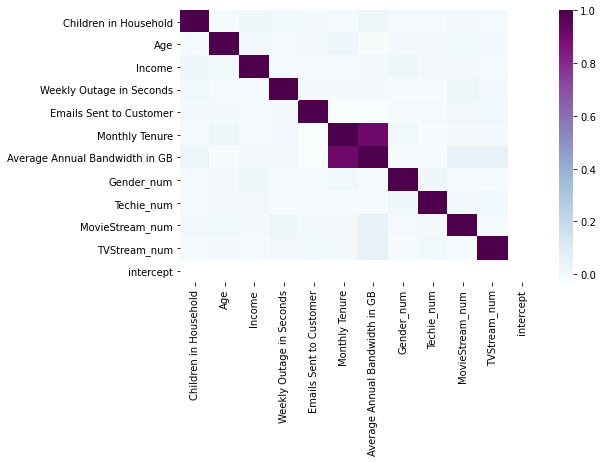

In [108]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), cmap="BuPu")
plt.show()


In [109]:
df.columns

Index(['Children in Household', 'Age', 'Income', 'Weekly Outage in Seconds',
       'Emails Sent to Customer', 'Monthly Tenure',
       'Average Annual Bandwidth in GB', 'Gender_num', 'Techie_num',
       'MovieStream_num', 'TVStream_num', 'intercept'],
      dtype='object')

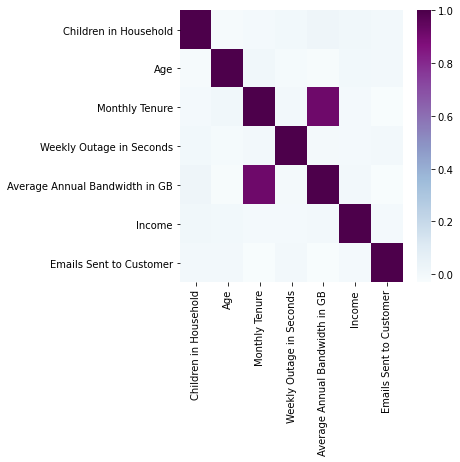

In [127]:
cat_df = df[['Children in Household', 'Age',
                            'Monthly Tenure', 'Weekly Outage in Seconds', 'Average Annual Bandwidth in GB', 
                            'Income', 'Emails Sent to Customer']]

plt.figure(figsize = (5,5))
sns.heatmap(cat_df.corr(), cmap="BuPu")
plt.show()


In [ ]:
'Children in Household', 'Age',
                            'Monthly Tenure', 'Weekly Outage in Seconds', 'Average Annual Bandwidth in GB', 
                            'Income', 'Emails Sent to Customer', 'Techie_num'

In [130]:
# Run reduced OLS multiple regression
df['intercept'] = 1
lm_bandwidth_reduced = sm.OLS(df['Average Annual Bandwidth in GB'], df[['Children in Household', 'Age',
                            'Monthly Tenure', 'Weekly Outage in Seconds',
                            'Income', 'Emails Sent to Customer']]).fit()
print(lm_bandwidth_reduced.summary())


                                       OLS Regression Results                                      
Dep. Variable:     Average Annual Bandwidth in GB   R-squared (uncentered):                   0.937
Model:                                        OLS   Adj. R-squared (uncentered):              0.937
Method:                             Least Squares   F-statistic:                          2.470e+04
Date:                            Mon, 28 Nov 2022   Prob (F-statistic):                        0.00
Time:                                    04:57:44   Log-Likelihood:                         -2934.2
No. Observations:                           10000   AIC:                                      5880.
Df Residuals:                                9994   BIC:                                      5924.
Df Model:                                       6                                                  
Covariance Type:                        nonrobust                                                  


In [129]:
#residual

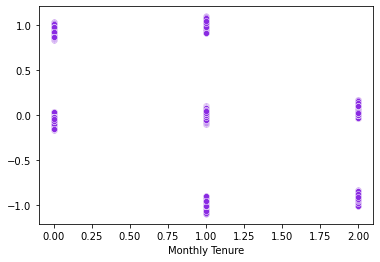

In [131]:
df['intercept'] = 1
residuals = df['Average Annual Bandwidth in GB'] - lm_bandwidth_reduced.predict(df[['Children in Household', 'Age',
                            'Monthly Tenure', 'Weekly Outage in Seconds', 
                            'Income', 'Emails Sent to Customer']])
sns.scatterplot(x=df['Monthly Tenure'],y=residuals,color='blueviolet')
plt.show();


In [132]:
cat_df.to_csv('D208 Reduced.csv')

In [133]:
#Regression equation for the reduced mode: Bandwidth_GB_Year = 423.28 + (84.02 * Tenure) + (257.03 * Churn).

plug where need



SyntaxError: invalid syntax (<ipython-input-133-37a07ca01f9e>, line 3)